In [1]:
import pickle
import mne
import numpy as np

data_dir = "/Users/martin.iniguez/Desktop/master-thesis/opm-thesis/data/data_nottingham_preprocessed/analyzed/"

acq_times = ["155445", "160513", "161344", "163001"]

all_bads = []
preprocessed_epochs = []
baseline = []
for i in range(4):
    preprocessing = pickle.load(
        open(data_dir + "preprocessing_" + acq_times[i] + ".pkl", "rb")
    )
    epochs_corrected = preprocessing.epochs_corrected
    preprocessed_epochs.append(epochs_corrected)
    all_bads.extend(epochs_corrected.info["bads"])
    baseline.append(epochs_corrected.baseline[-1])

baseline = np.mean(baseline)
for i in range(4):
    preprocessed_epochs[i].apply_baseline(baseline=(-2,baseline))
    preprocessed_epochs[i].info["bads"] = all_bads
    preprocessed_epochs[i].drop_bad()

# Check which baselane
all_epochs = mne.concatenate_epochs(preprocessed_epochs)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


/var/folders/nt/fwws5ndx2lg885k2_8f0nhk00000gn/T/ipykernel_70707/4003044160.py:28: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(preprocessed_epochs)


Not setting metadata
378 matching events found
Applying baseline correction (mode: mean)


device(type='mps')

In [21]:
labels = np.unique(all_epochs.events[:, -1])
freqs = np.linspace(15, 22, 10)
n_cycles = freqs / 2  # different number of cycle per frequency

power = {}
for idx, label in enumerate(labels):
  valid_epochs_mask = np.isin(all_epochs.events[:, -1], label)
  label_epochs = all_epochs[valid_epochs_mask]

  power[str(idx+1)] = mne.time_frequency.tfr_morlet(
      label_epochs,
      freqs=freqs,
      n_cycles=n_cycles,
      n_jobs=-1,
      return_itc=False,
      decim=3,
  )


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   19.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]

In [10]:
with open("/Users/martin.iniguez/Desktop/master-thesis/opm-thesis/data/epochs/epochs_tfr.pkl", "wb") as f:
    pickle.dump(power, f)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


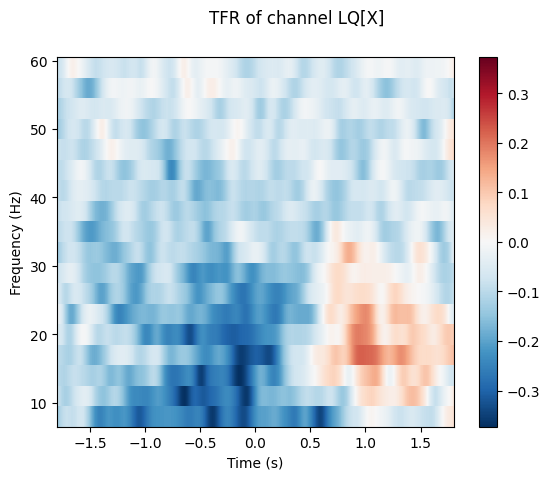

[<Figure size 640x480 with 2 Axes>]

In [68]:
import mne
import numpy as np
# Assuming you have 'epochs' object already
# Define frequency bands
epochs = preprocessed_epochs[i].copy()
fmin = 8
fmax = 60
freqs = np.arange(fmin, fmax + 1, 3)
center_channel = "LQ[X]"
epochs = epochs.pick(center_channel)

n_cycles = freqs / 2  # different number of cycle per frequency
power = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, n_jobs=-1,
                                      return_itc=False)

# Plot the TFR for channel 'MEG 0712' (replace with your channel name)
power.plot([epochs.ch_names.index(center_channel)], baseline=(-2, -0.57), mode='logratio', tmin=-1.8, tmax=1.8,
           title='TFR of channel '+center_channel)


In [29]:
data.epochs_corrected.ch_names


['LQ[X]']

In [13]:
epochs = data.epochs_reduced
import mne
import numpy as np
freqs = np.arange(5, 30)
cycles = 1/freqs
tfr = mne.time_frequency.tfr_multitaper(inst=epochs, return_itc=False, n_jobs=-1, freqs=freqs, n_cycles=freqs/2)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:   38.6s finished


Applying baseline correction (mode: mean)


/Users/martin.iniguez/Desktop/master_thesis/opm-thesis/.venv/lib/python3.9/site-packages/mne/time_frequency/tfr.py:3069: RuntimeWarning: invalid value encountered in log10
  data = 10 * np.log10(data)


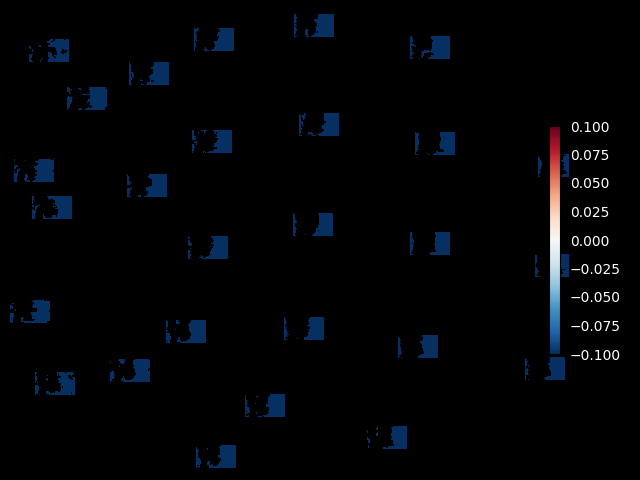

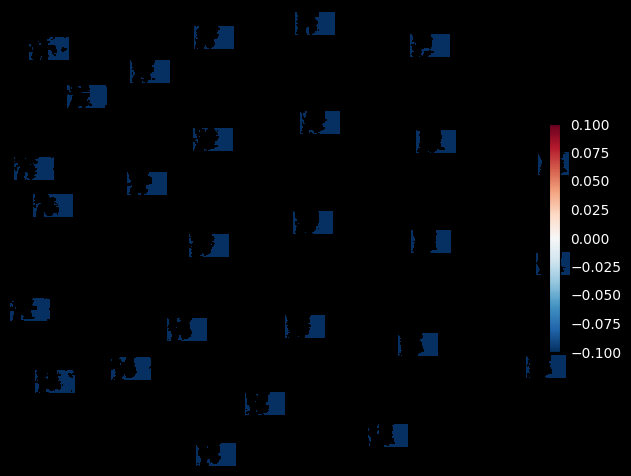

In [17]:
tfr.plot_topo(baseline=(-1.5, -.7), tmin=-1.5, tmax=1.5, dB=True)


In [72]:
import os
import pickle
import mne
import numpy as np
from opm_thesis.classifiers.classifier import DeepConvNet

# Define the path to the data directory
DATA_DIR = "./data/epochs"

# Get a list of all the files in the data directory
file_list = os.listdir(DATA_DIR)

# Concatenate all the data into a single array
data = []
for file_name in file_list:
    file_path = os.path.join(DATA_DIR, file_name)
    with open(file_path, "rb") as f:
        epoch_data = pickle.load(f)
    data.append(epoch_data)

epochs = mne.concatenate_epochs(data)


/var/folders/nt/fwws5ndx2lg885k2_8f0nhk00000gn/T/ipykernel_28066/2827923130.py:21: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(data)


Not setting metadata
378 matching events found
Applying baseline correction (mode: mean)


In [74]:
picks = mne.pick_types(epochs.info, meg=True, exclude="bads")
epochs_picked = epochs.copy().pick(picks)
data = epochs_picked.get_data()


In [75]:
data.shape


(378, 44, 4801)